# Analytically remove the goethite component

Goethite (α-FeOOH) is a common oxyhydroxide within soils, sediments, and other oxidized materials on Earth's surface. When goethite is cooled from room temperature (~300 K) to lower temperatures, it exhibits an increase in its magnetization (Rochette and Fillion, 1989). This increase is reversible when goethite is warmed back up to room temperature (Carter-Stiglitz et al., 2006). 

This low-temperature behavior can result in an increasing slope in experiments on an MPMS where a sample is pulsed with a field at room temperature and then cooled in zero field to low-temperature. Such an experiment is known as an RT-SIRM low-temperature cycling experiment and is denoted with the MagIC method codes:
- `LP-CW-SIRM:LP-MC` (Cycling between cooling and warming: Room temperature SIRM; Measured while cooling)
- `LP-CW-SIRM:LP-MW` (Cycling between cooling and warming: Room temperature SIRM; Measured while warming)

In a sample of mixed mineralogy that contains goethite, this low-temperature behavior is useful for inferring the presence of goethite. Such an interpretation can be further strengthened by data from zero-field cooled (ZFC) and field cooled (FC) remanence upon warming experiments. Such experiments both show a large progressive loss of remanence upon warming. Additionally, a diagnostic behavior for goethite is that the FC curve has a stronger magnetization than the ZFC curve (Liu et al., 2006). Τhe reason for the loss in remanent magnetization upon warming in these FC/ZFC epxeriments, as well as the difference in the FC and ZFC magnetization is that some of the goethite grains are acquiring a thermal remanent magnetization, with more of a thermal remanence being acquired during the FC experiment (Liu et al., 2006). Samples showing this behavior are indicative of blocking temperatures below 300 K (Liu et al., 2006).

In summary:

> The combination of the large discrepancy between the FC and ZFC curves, and the large and reversible increase in remanence upon cooling, are therefore diagnostic of the presence of goethite (Liu et al., 2006).

While this low-temperature behavior is quite useful for diagnosing the presence of goethite, it can be a nuisance in the results of such experiments as it can obscure the behavior of other phases. There are two main approaches for dealing with this and removing the contribution of goethite:
- experimentally: 
- analytically:

In [1]:
import rockmag as rmag
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
# set the directory path (dir_path) to the data
dir_path = './example_data/goethite'

ipmag.download_magic('A73-7-1350-4B-01a_mpms.txt', 
                     dir_path = dir_path,
                     input_dir_path = dir_path)

# create a contribution object from the tables in the directory
contribution = cb.Contribution(dir_path)
measurements = contribution.tables['measurements'].df

measurements.dropna(axis=1, how='all').head() # see the first 5 measurements without empty columns

working on:  'specimens\r'
1  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/goethite/specimens.txt
  data put in  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/goethite/specimens.txt
working on:  'samples\r'
1  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/goethite/samples.txt
  data put in  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/goethite/samples.txt
working on:  'sites\r'
1  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/goethite/sites.txt
  data put in  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/goethite/sites.txt
working on:  'locations\r'
1  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/goethite/locations.txt
  data put in  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/goethite/locations.txt
working on:  'measurements\r'
240  records written to file  /Users/unimos/0000_Git

,experiment,instrument_codes,magn_mass,magn_r2_det,meas_field_dc,meas_temp,measurement,method_codes,quality,specimen,standard,timestamp
measurement name,,,,,,,,,,,,
A73-7-1350-4B-01a-LP-FC-DC-14109-0-0,A73-7-1350-4B-01a-LP-FC-DC-14109,IRM-MPMS3,0.027394,2.715563e-07,0.002531,10.000116,A73-7-1350-4B-01a-LP-FC-DC-14109-0-0,LP-FC,g,A73-7-1350-4B-01a,u,2093:06:23:05:14:35.739
A73-7-1350-4B-01a-LP-FC-DC-14109-0-1,A73-7-1350-4B-01a-LP-FC-DC-14109,IRM-MPMS3,0.027376,2.660482e-07,0.002531,10.265534,A73-7-1350-4B-01a-LP-FC-DC-14109-0-1,LP-FC,g,A73-7-1350-4B-01a,u,2093:06:23:05:14:39.928
A73-7-1350-4B-01a-LP-FC-DC-14109-0-2,A73-7-1350-4B-01a-LP-FC-DC-14109,IRM-MPMS3,0.024952,1.203919e-06,0.002531,15.057111,A73-7-1350-4B-01a-LP-FC-DC-14109-0-2,LP-FC,g,A73-7-1350-4B-01a,u,2093:06:23:05:15:12.16
A73-7-1350-4B-01a-LP-FC-DC-14109-0-3,A73-7-1350-4B-01a-LP-FC-DC-14109,IRM-MPMS3,0.022089,8.515676e-07,0.002531,20.002497,A73-7-1350-4B-01a-LP-FC-DC-14109-0-3,LP-FC,g,A73-7-1350-4B-01a,u,2093:06:23:05:15:42.989
A73-7-1350-4B-01a-LP-FC-DC-14109-0-4,A73-7-1350-4B-01a-LP-FC-DC-14109,IRM-MPMS3,0.020069,6.714368e-07,0.002531,25.103758,A73-7-1350-4B-01a-LP-FC-DC-14109-0-4,LP-FC,g,A73-7-1350-4B-01a,u,2093:06:23:05:16:16.287


In [8]:
experiments = measurements.groupby(['specimen', 'method_codes']).size().reset_index().iloc[:, :2]
experiments

,specimen,method_codes
0,A73-7-1350-4B-01a,LP-CW-SIRM:LP-MC
1,A73-7-1350-4B-01a,LP-CW-SIRM:LP-MW
2,A73-7-1350-4B-01a,LP-FC
3,A73-7-1350-4B-01a,LP-ZFC


In [5]:
specimen_name = 'A73-7-1350-4B-01a'
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data(measurements, specimen_name)

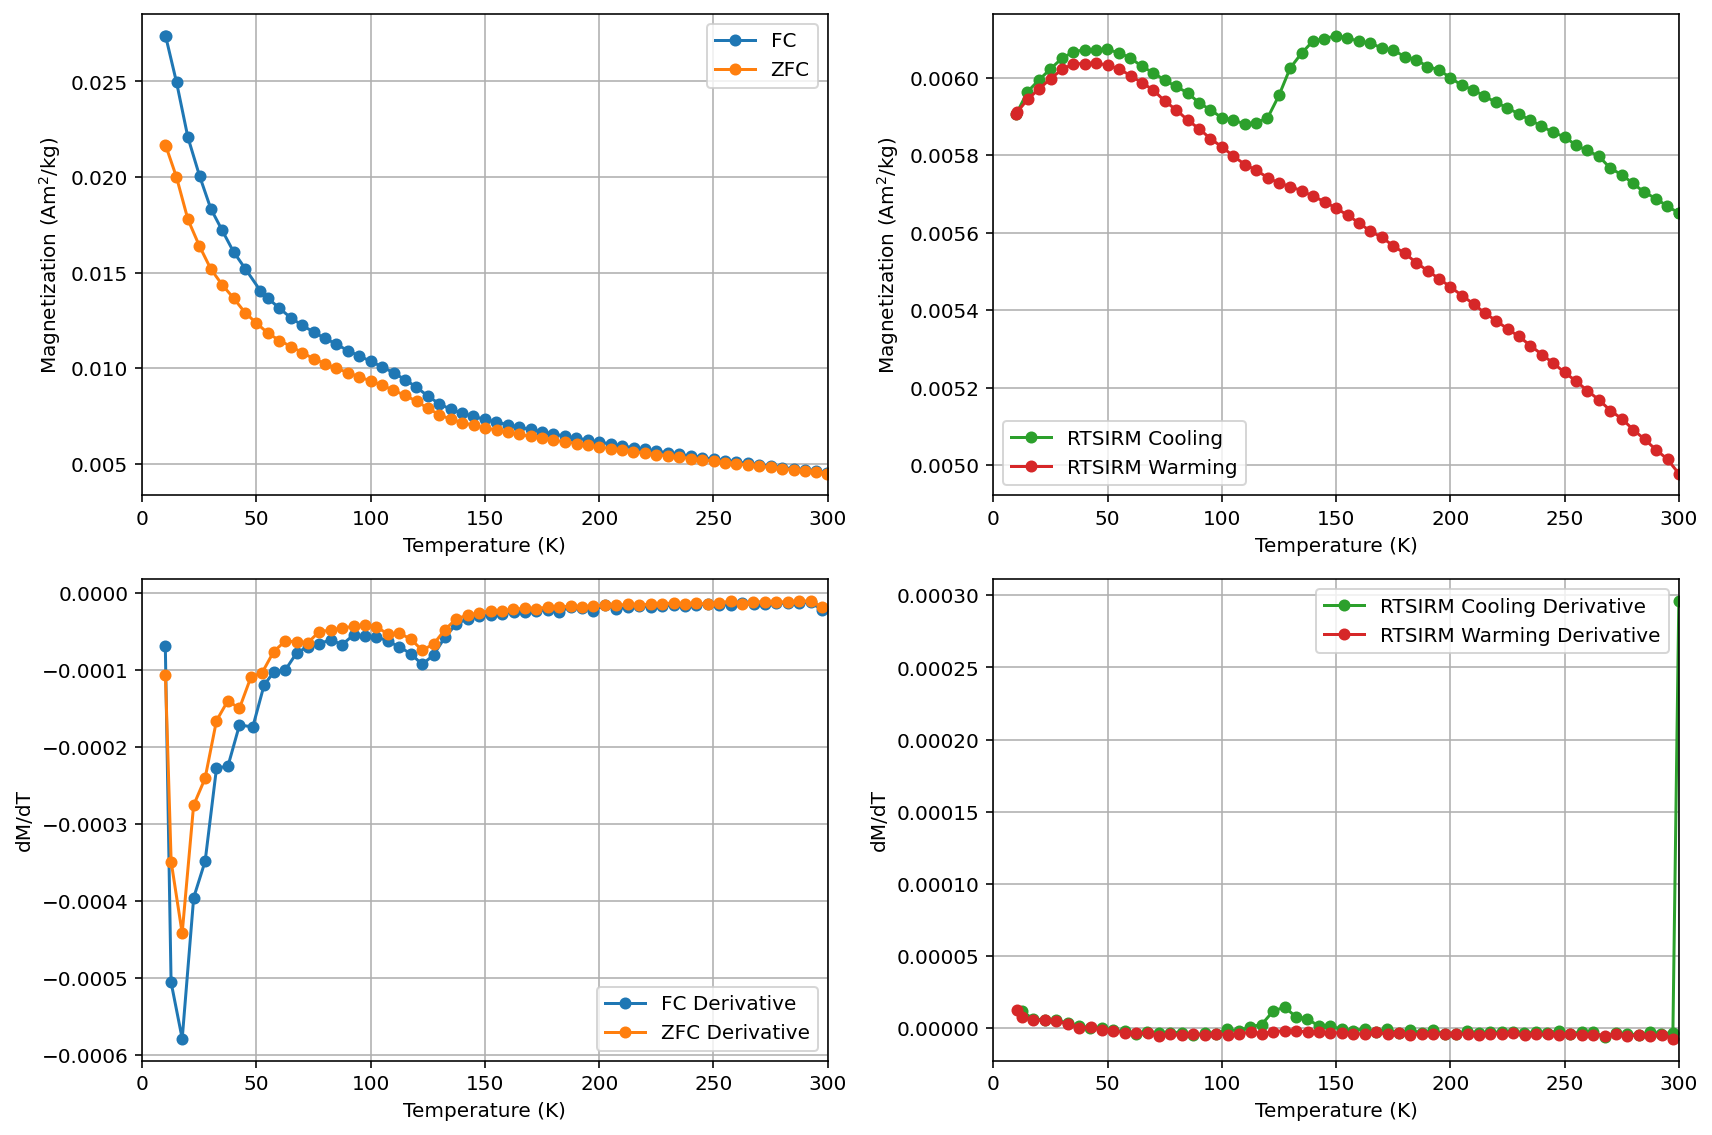

In [9]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data,
                    plot_derivative=True)

In [ ]:
temps = fc_data['meas_temp']
mags = fc_data['magn_mass']

#Enter the minimum temperature for the background fit
t_range_background_min = 55 

#Enter the maximum temperature for the background fit
t_range_background_max = 250 

#Enter the minimum temperature to exclude from the background fit
excluded_t_min = 75 

#Enter the maximum temperature to exclude from the background fit
excluded_t_max = 150 

#The polynomial degree for the background fit can be adjusted (default is 3)
poly_deg = 3

verwey_estimate, remanence_loss = rmag.verwey_estimate(temps, mags, 
                                       t_range_background_min,
                                       t_range_background_max,
                                       excluded_t_min,
                                       excluded_t_max,
                                       poly_deg)

## References cited

Liu, Q., Yu, Y., Torrent, J., Roberts, A. P., Pan, Y., and Zhu, R., 2006, Characteristic low-temperature magnetic
properties of aluminous goethite [α-(Fe, Al)OOH] explained: Journal of Geophysical Research, v. 111,
B12S34, http://dx.doi.org/10.1029/2006JB004560

Rochette, P., and Fillion, G., 1989, Field and temperature behavior of remanence in synthetic goethite:
Paleomagnetic implications: Geophysical Research Letters, v. 16, n. 8, p. 851–854, http://dx.doi.org/
10.1029/GL016i008p00851